<a href="https://colab.research.google.com/github/paritosh-Shukla24/Langchain_Basic_to_Adv/blob/main/Autogen/Multimodal_Autogen_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install "autogen-agentchat[lmm]~=0.2"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 382.3/382.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.2/314.2 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.8 MB/s eta 0:00:00


In [ ]:
import json
import os
import random
import time
from typing import Any, Callable, Dict, List, Optional, Tuple, Type, Union

import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image
from termcolor import colored

import autogen
from autogen import Agent, AssistantAgent, ConversableAgent, UserProxyAgent
from autogen.agentchat.contrib.capabilities.vision_capability import VisionCapability
from autogen.agentchat.contrib.img_utils import get_pil_image, pil_to_data_uri
from autogen.agentchat.contrib.multimodal_conversable_agent import MultimodalConversableAgent
from autogen.code_utils import content_str

In [ ]:
from google.colab import userdata
import os

api_key = userdata.get('OPENAI_API_KEY')
os.environ['OPENAI_API_KEY'] = api_key

In [28]:
# Save config to file first
import json
config = [
    {
        "model": "gpt-4-turbo",
        "api_key": api_key
    },
    {
        "model": "gpt-4",
        "api_key": api_key
    }
]
with open("OAI_CONFIG_LIST", "w") as f:
    json.dump(config, f)

# Then load from file
config_list_4v = autogen.config_list_from_json(
    "OAI_CONFIG_LIST",
    filter_dict={
        "model": ["gpt-4-turbo"],
    }
)

In [29]:
from autogen.oai import filter_config

config_list_4v = filter_config(config, {"model": ["gpt-4-turbo"]})
config_list_gpt4 = filter_config(config, {
    "model": ["gpt-4", "gpt-4-0314", "gpt4", "gpt-4-32k", "gpt-4-32k-0314", "gpt-4-32k-v0314"]
})

In [30]:
image_agent = MultimodalConversableAgent(
    name="image-explainer",
    max_consecutive_auto_reply=10,
    llm_config={"config_list": config_list_4v, "temperature": 0.5, "max_tokens": 300},
)

user_proxy = autogen.UserProxyAgent(
    name="User_proxy",
    system_message="A human admin.",
    human_input_mode="NEVER",  # Try between ALWAYS or NEVER
    max_consecutive_auto_reply=0,
    code_execution_config={
        "use_docker": False
    },  # Please set use_docker=True if docker is available to run the generated code. Using docker is safer than running the generated code directly.
)

# Ask the question with an image
user_proxy.initiate_chat(
    image_agent,
    message="""What's the breed of this dog?
<img https://th.bing.com/th/id/R.422068ce8af4e15b0634fe2540adea7a?rik=y4OcXBE%2fqutDOw&pid=ImgRaw&r=0>.""",
)

User_proxy (to image-explainer):

What's the breed of this dog?
<image>.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
image-explainer (to User_proxy):

This dog appears to be a Goldendoodle, a popular hybrid breed that combines the Golden Retriever and the Poodle. They are known for their curly, hypoallergenic coats and friendly, intelligent disposition.

--------------------------------------------------------------------------------


ChatResult(chat_id=None, chat_history=[{'content': "What's the breed of this dog?\n<img https://th.bing.com/th/id/R.422068ce8af4e15b0634fe2540adea7a?rik=y4OcXBE%2fqutDOw&pid=ImgRaw&r=0>.", 'role': 'assistant', 'name': 'User_proxy'}, {'content': 'This dog appears to be a Goldendoodle, a popular hybrid breed that combines the Golden Retriever and the Poodle. They are known for their curly, hypoallergenic coats and friendly, intelligent disposition.', 'role': 'user', 'name': 'image-explainer'}], summary='This dog appears to be a Goldendoodle, a popular hybrid breed that combines the Golden Retriever and the Poodle. They are known for their curly, hypoallergenic coats and friendly, intelligent disposition.', cost={'usage_including_cached_inference': {'total_cost': 0.01248, 'gpt-4-turbo-2024-04-09': {'cost': 0.01248, 'prompt_tokens': 1113, 'completion_tokens': 45, 'total_tokens': 1158}}, 'usage_excluding_cached_inference': {'total_cost': 0.01248, 'gpt-4-turbo-2024-04-09': {'cost': 0.01248, 

In [31]:
user_proxy.send(
    message="""What is this breed?
<img https://th.bing.com/th/id/OIP.29Mi2kJmcHHyQVGe_0NG7QHaEo?pid=ImgDet&rs=1>

Among the breeds, which one barks less?""",
    recipient=image_agent,
)

User_proxy (to image-explainer):

What is this breed?
<image>

Among the breeds, which one barks less?

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
image-explainer (to User_proxy):

The dog in the image is a Siberian Husky. Siberian Huskies are known for their striking appearance with a dense double coat, erect triangular ears, and distinctive markings.

Regarding barking, Siberian Huskies are generally considered to bark less than many other breeds. They are more likely to howl or make other vocalizations instead of barking. If you're considering a dog breed based on the amount of barking, Huskies might be a suitable choice due to their relatively quieter nature in terms of barking.

--------------------------------------------------------------------------------


In [32]:
working_dir = "tmp/"


In [33]:
class FigureCreator(ConversableAgent):
    def __init__(self, n_iters=2, **kwargs):
        """
        Initializes a FigureCreator instance.

        This agent facilitates the creation of visualizations through a collaborative effort among its child agents: commander, coder, and critics.

        Parameters:
            - n_iters (int, optional): The number of "improvement" iterations to run. Defaults to 2.
            - **kwargs: keyword arguments for the parent AssistantAgent.
        """
        super().__init__(**kwargs)
        self.register_reply([Agent, None], reply_func=FigureCreator._reply_user, position=0)
        self._n_iters = n_iters

    def _reply_user(self, messages=None, sender=None, config=None):
        if all((messages is None, sender is None)):
            error_msg = f"Either {messages=} or {sender=} must be provided."
            logger.error(error_msg)  # noqa: F821
            raise AssertionError(error_msg)
        if messages is None:
            messages = self._oai_messages[sender]

        user_question = messages[-1]["content"]

        ### Define the agents
        commander = AssistantAgent(
            name="Commander",
            human_input_mode="NEVER",
            max_consecutive_auto_reply=10,
            system_message="Help me run the code, and tell other agents it is in the <img result.jpg> file location.",
            is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"),
            code_execution_config={"last_n_messages": 3, "work_dir": working_dir, "use_docker": False},
            llm_config=self.llm_config,
        )

        critics = MultimodalConversableAgent(
            name="Critics",
            system_message="""Criticize the input figure. How to replot the figure so it will be better? Find bugs and issues for the figure.
            Pay attention to the color, format, and presentation. Keep in mind of the reader-friendliness.
            If you think the figures is good enough, then simply say NO_ISSUES""",
            llm_config={"config_list": config_list_4v, "max_tokens": 300},
            human_input_mode="NEVER",
            max_consecutive_auto_reply=1,
            #     use_docker=False,
        )

        coder = AssistantAgent(
            name="Coder",
            llm_config=self.llm_config,
        )

        coder.update_system_message(
            coder.system_message
            + "ALWAYS save the figure in `result.jpg` file. Tell other agents it is in the <img result.jpg> file location."
        )

        # Data flow begins
        commander.initiate_chat(coder, message=user_question)
        img = Image.open(os.path.join(working_dir, "result.jpg"))
        plt.imshow(img)
        plt.axis("off")  # Hide the axes
        plt.show()

        for i in range(self._n_iters):
            commander.send(
                message=f"Improve <img {os.path.join(working_dir, 'result.jpg')}>",
                recipient=critics,
                request_reply=True,
            )

            feedback = commander._oai_messages[critics][-1]["content"]
            if feedback.find("NO_ISSUES") >= 0:
                break
            commander.send(
                message="Here is the feedback to your figure. Please improve! Save the result to `result.jpg`\n"
                + feedback,
                recipient=coder,
                request_reply=True,
            )
            img = Image.open(os.path.join(working_dir, "result.jpg"))
            plt.imshow(img)
            plt.axis("off")  # Hide the axes
            plt.show()

        return True, os.path.join(working_dir, "result.jpg")

In [36]:
gpt4_llm_config = {"config_list": config_list_gpt4, "cache_seed": 42}

User (to Figure Creator~):


Plot a figure by using the data from:
https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv

I want to show both temperature high and low.


--------------------------------------------------------------------------------
Commander (to Coder):


Plot a figure by using the data from:
https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv

I want to show both temperature high and low.


--------------------------------------------------------------------------------
Coder (to Commander):

Ok, in order to accomplish this task, I suggest using the libraries pandas for data manipulation, requests for fetching the data from the web, and matplotlib for plotting the figure. 

Here is the concrete plan:
1. Fetch the weather data from the given URL using requests.
2. Parse the data into a pandas DataFrame for easy manipulation.
3. Use matplotlib to plot the high and low temperatures. 

Here is the Python code to execut

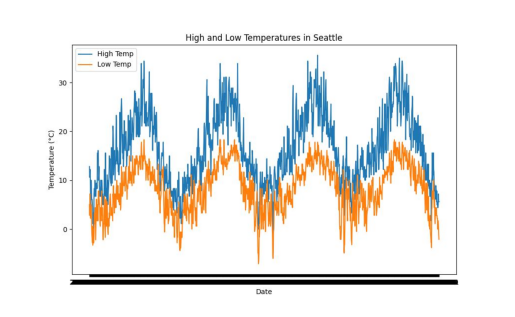

Commander (to Critics):

Improve <image>

--------------------------------------------------------------------------------
Critics (to Commander):

This graph on "High and Low Temperatures in Seattle" can be improved in several ways to enhance readability and presentation:

1. **Axis Labels and Ticks**: The x-axis lacks any labels or tick marks indicating the dates or time periods under consideration. Adding date labels will help users understand the temporal context of the data.
   
2. **Smoothing Lines**: The data lines for the temperatures are extremely jagged, which might indicate daily fluctuations. Applying a smoothing function (like a moving average) could help in visualizing more general trends and reducing visual clutter.

3. **Grid Lines**: Adding horizontal grid lines could make it easier to estimate the temperature values at various points in the graph.

4. **Legend Positioning**: The legend is currently placed well, but ensuring it does not overlap any crucial data when th

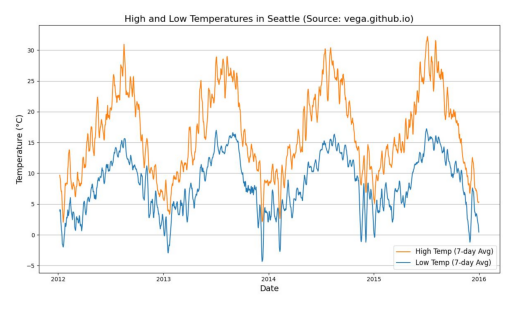

Commander (to Critics):

Improve <image>

--------------------------------------------------------------------------------
Commander (to Coder):

Here is the feedback to your figure. Please improve! Save the result to `result.jpg`
Improve <img tmp/result.jpg>

--------------------------------------------------------------------------------
Coder (to Commander):

Based on the feedback, it appears the enhancements to the temperature plot provided with the updated Python code have not met all your expectations. You didn't specify the exact improvements you'd like. But considering the feedback provided before, I can see one more area we could improve:

To make this figure even more user-friendly, we could consider:
1. Increasing the size of font labels and title for easier readability,
2. Adding month labels on the x-axis to better illustrate when temperatures tend to rise or fall during the year,
3. Checking the visibility of line plots.

Let's modify the Python code to apply these change

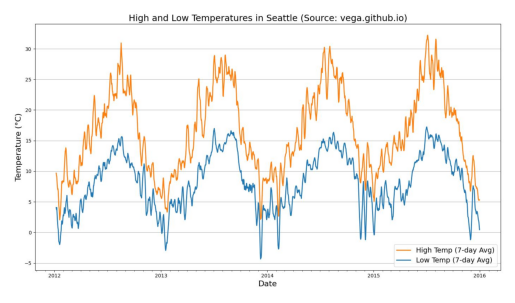

Figure Creator~ (to User):

tmp/result.jpg

--------------------------------------------------------------------------------


ChatResult(chat_id=None, chat_history=[{'content': '\nPlot a figure by using the data from:\nhttps://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv\n\nI want to show both temperature high and low.\n', 'role': 'assistant', 'name': 'User'}, {'content': 'tmp/result.jpg', 'role': 'user', 'name': 'Figure Creator~'}], summary='tmp/result.jpg', cost={'usage_including_cached_inference': {'total_cost': 0}, 'usage_excluding_cached_inference': {'total_cost': 0}}, human_input=[])

In [37]:
creator = FigureCreator(name="Figure Creator~", llm_config=gpt4_llm_config)

user_proxy = autogen.UserProxyAgent(
    name="User", human_input_mode="NEVER", max_consecutive_auto_reply=0, code_execution_config={"use_docker": False}
)

user_proxy.initiate_chat(
    creator,
    message="""
Plot a figure by using the data from:
https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv

I want to show both temperature high and low.
""",
)

**Vision Capability: Group Chat Example with Multimodal Agent**

In [38]:
agent1 = MultimodalConversableAgent(
    name="image-explainer-1",
    max_consecutive_auto_reply=10,
    llm_config={"config_list": config_list_4v, "temperature": 0.5, "max_tokens": 300},
    system_message="Your image description is poetic and engaging.",
)
agent2 = MultimodalConversableAgent(
    name="image-explainer-2",
    max_consecutive_auto_reply=10,
    llm_config={"config_list": config_list_4v, "temperature": 0.5, "max_tokens": 300},
    system_message="Your image description is factual and to the point.",
)

user_proxy = autogen.UserProxyAgent(
    name="User_proxy",
    system_message="Desribe image for me.",
    human_input_mode="TERMINATE",  # Try between ALWAYS, NEVER, and TERMINATE
    max_consecutive_auto_reply=10,
    code_execution_config={
        "use_docker": False
    },  # Please set use_docker=True if docker is available to run the generated code. Using docker is safer than running the generated code directly.
)

# We set max_round to 5
groupchat = autogen.GroupChat(agents=[agent1, agent2, user_proxy], messages=[], max_round=5)

vision_capability = VisionCapability(lmm_config={"config_list": config_list_4v, "temperature": 0.5, "max_tokens": 300})
group_chat_manager = autogen.GroupChatManager(groupchat=groupchat, llm_config=gpt4_llm_config)
vision_capability.add_to_agent(group_chat_manager)

rst = user_proxy.initiate_chat(
    group_chat_manager,
    message="""Write a poet for my image:
                        <img https://th.bing.com/th/id/R.422068ce8af4e15b0634fe2540adea7a?rik=y4OcXBE%2fqutDOw&pid=ImgRaw&r=0>.""",
)

User_proxy (to chat_manager):

Write a poet for my image:
                        <img https://th.bing.com/th/id/R.422068ce8af4e15b0634fe2540adea7a?rik=y4OcXBE%2fqutDOw&pid=ImgRaw&r=0>.

--------------------------------------------------------------------------------

Next speaker: image-explainer-1


>>>>>>>> USING AUTO REPLY...
image-explainer-1 (to chat_manager):

In the quiet corner of a welcoming home,
Where white tiles mirror the light that's thrown,
Lies a bundle of curls, apricot-hued,
With eyes like dewdrops, morning imbued.

Westphal, the name on his tiny tag,
A miniature poodle, not a bit of a brag.
His collar a kaleidoscope against his soft fur,
Colors that speak of the joys that stir.

Those soulful eyes, a curious gaze,
Capturing hearts in a soft, gentle blaze.
He lounges there, by the door, a guard,
Waiting for footsteps, his senses on hard.

Nearby, black boots, resting from the day,
Hint at journeys taken, come what may.
But here in this nook, time gently slows,
As Wes

In [39]:
agent_no_vision = AssistantAgent(name="Regular LLM Agent", llm_config=gpt4_llm_config)

agent_with_vision = AssistantAgent(name="Regular LLM Agent with Vision Capability", llm_config=gpt4_llm_config)
vision_capability = VisionCapability(lmm_config={"config_list": config_list_4v, "temperature": 0.5, "max_tokens": 300})
vision_capability.add_to_agent(agent_with_vision)


user = UserProxyAgent(
    name="User",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=0,
    code_execution_config={"use_docker": False},
)

message = """Write a poet for my image:
                        <img https://th.bing.com/th/id/R.422068ce8af4e15b0634fe2540adea7a?rik=y4OcXBE%2fqutDOw&pid=ImgRaw&r=0>."""

In [40]:
user.send(message=message, recipient=agent_no_vision, request_reply=True)


User (to Regular LLM Agent):

Write a poet for my image:
                        <img https://th.bing.com/th/id/R.422068ce8af4e15b0634fe2540adea7a?rik=y4OcXBE%2fqutDOw&pid=ImgRaw&r=0>.

--------------------------------------------------------------------------------
Regular LLM Agent (to User):

I'm sorry, unfortunately as an AI, I do not have the ability to view or interpret images directly. However, I can help you create a poem by asking about the content, colors, mood, and other attributes of the image. Could you please describe the image to me in detail?

--------------------------------------------------------------------------------


In [41]:
user.send(message=message, recipient=agent_with_vision, request_reply=True)


User (to Regular LLM Agent with Vision Capability):

Write a poet for my image:
                        <img https://th.bing.com/th/id/R.422068ce8af4e15b0634fe2540adea7a?rik=y4OcXBE%2fqutDOw&pid=ImgRaw&r=0>.

--------------------------------------------------------------------------------
Regular LLM Agent with Vision Capability (to User):

Upon a floor so white and clean,
Lies an apricot hued dream serene.
Eyes of soulful dark abound,
On this charming puppy, innocence found.

Its fur is soft, curly, and bright,
A vibrant collar on its neck, a delightful sight.
The name "Westphal" tag does dangle,
In this scene of canine angle.

A pair of boots, black and sturdy,
The backdrop of this scene so wordy.
Near the entryway, it may be,
Where the puppy waits, full of glee.

A tilted head, oh such charm,
No one can resist its warm.
Waiting for an owner's return,
For their affection, it does yearn.

Through the lens, it curiously peers, 
Capturing hearts, easing fears.
The embodiment of playful 

In [42]:
def my_description(image_url: str, image_data: Image = None, lmm_client: object = None) -> str:
    """
    This function takes an image URL and returns the description.

    Parameters:
        - image_url (str): The URL of the image.
        - image_data (PIL.Image): The image data.
        - lmm_client (object): The LLM client object.

    Returns:
        - str: A description of the color of the image.
    """
    # Print the arguments for illustration purpose
    print("image_url", image_url)
    print("image_data", image_data)
    print("lmm_client", lmm_client)

    img_uri = pil_to_data_uri(image_data)  # cast data into URI (str) format for API call
    lmm_out = lmm_client.create(
        context=None,
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": "Describe this image in 10 words."},
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": img_uri,
                        },
                    },
                ],
            }
        ],
    )
    description = lmm_out.choices[0].message.content
    description = content_str(description)

    # Convert the image into an array of pixels.
    pixels = np.array(image_data)

    # Calculate the average color.
    avg_color_per_row = np.mean(pixels, axis=0)
    avg_color = np.mean(avg_color_per_row, axis=0)
    avg_color = avg_color.astype(int)  # Convert to integer for color values

    # Format the average color as a string description.
    caption = f"""The image is from {image_url}
    It is about: {description}
    The average color of the image is RGB:
        ({avg_color[0]}, {avg_color[1]}, {avg_color[2]})"""

    print(caption)  # For illustration purpose

    return caption

In [43]:
agent_with_vision_and_func = AssistantAgent(
    name="Regular LLM Agent with Custom Func and LMM", llm_config=gpt4_llm_config
)

vision_capability_with_func = VisionCapability(
    lmm_config={"config_list": config_list_4v, "temperature": 0.5, "max_tokens": 300},
    custom_caption_func=my_description,
)
vision_capability_with_func.add_to_agent(agent_with_vision_and_func)

user.send(message=message, recipient=agent_with_vision_and_func, request_reply=True)

User (to Regular LLM Agent with Custom Func and LMM):

Write a poet for my image:
                        <img https://th.bing.com/th/id/R.422068ce8af4e15b0634fe2540adea7a?rik=y4OcXBE%2fqutDOw&pid=ImgRaw&r=0>.

--------------------------------------------------------------------------------
image_url https://th.bing.com/th/id/R.422068ce8af4e15b0634fe2540adea7a?rik=y4OcXBE%2fqutDOw&pid=ImgRaw&r=0
image_data <PIL.Image.Image image mode=RGB size=1920x1080 at 0x7EE09EDABD90>
lmm_client <autogen.oai.client.OpenAIWrapper object at 0x7ee09e7190c0>
The image is from https://th.bing.com/th/id/R.422068ce8af4e15b0634fe2540adea7a?rik=y4OcXBE%2fqutDOw&pid=ImgRaw&r=0
    It is about: Cute curly-haired puppy lying indoors, colorful collar, looking adorable.
    The average color of the image is RGB:
        (170, 155, 137)
Regular LLM Agent with Custom Func and LMM (to User):

A curly-haired pup of adorable mien,
In the cozy indoors comfort can be seen.
Round its neck, a collar of cheerful hue,
Addin